# 1] Introduction:

- Gold has always been an attractive investment option for investors worldwide, owing to its historical significance, stability, and hedge against inflation. Gold prices are volatile and are subject to numerous macroeconomic and geopolitical factors, including interest rates, currency fluctuations, global trade market, and political stability. Hence, predicting gold prices accurately is a challenging task.


### Goal of a Project

- In this machine learning project, we aim to forecast gold prices for the next few months using historical gold price data from 2016 to 2021. We will use various time series analysis techniques, statistical models, and machine learning algorithms to predict future gold prices.

- The project aims to develop a robust and accurate forecasting model that can be used by investors, traders, and other stakeholders to make informed investment decisions.

# 2] Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\gold forecasting\\Gold_data.csv")
df

date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [4]:
df.isnull().sum()

date     0
price    0
dtype: int64

# 3] Data Exploration

In [5]:
# Lets check the distribution of price

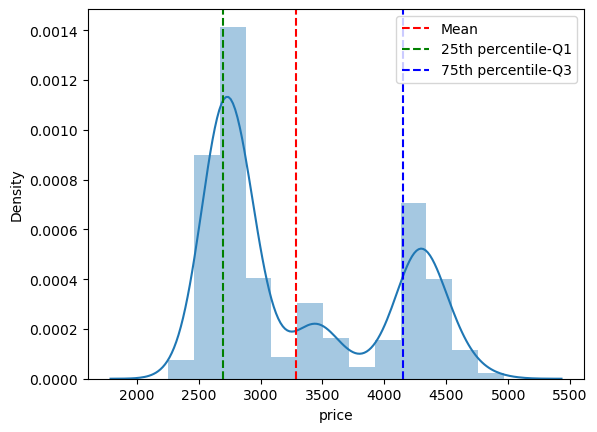

In [6]:
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']),c='red',ls='--',label='Mean')
plt.axvline(x=np.percentile(df['price'],25),c='green',ls='--',label='25th percentile-Q1')
plt.axvline(x=np.percentile(df['price'],75),c='blue',ls='--',label='75th percentile-Q3')
plt.legend()

- From above distribution plot we can see that data is right skewed
- Also it is bimodal distribution

In [7]:
df['price'].describe().T

count    2182.000000
mean     3284.450046
std       719.564434
min      2252.600000
25%      2697.020000
50%      2879.800000
75%      4147.325000
max      4966.300000
Name: price, dtype: float64

In [8]:
# There are 2,182 observations in the data.
# The mean price is 3,284.45.
# The standard deviation of the price is 719.56.
# The minimum price is 2,252.60.
# The 25th percentile (i.e., the value below which 25% of the data falls) is 2,697.02.
# The median price is 2,879.80 (i.e., 50% of the data falls below this value).
# The 75th percentile (i.e., the value below which 75% of the data falls) is 4,147.33.
# The maximum price is 4,966.30.

<AxesSubplot:xlabel='price', ylabel='Count'>

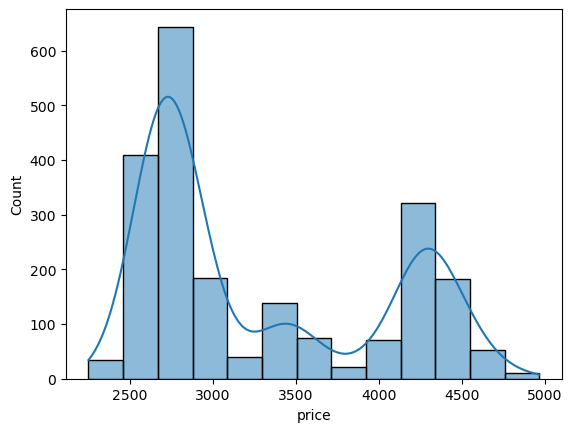

In [9]:
sns.histplot(df['price'],kde=True)

- The gold price values from 2600-2900 are most frequently occured ,the second most frequently occured values are between 4100 - 4400 

In [10]:
# Check for the outliers

<AxesSubplot:>

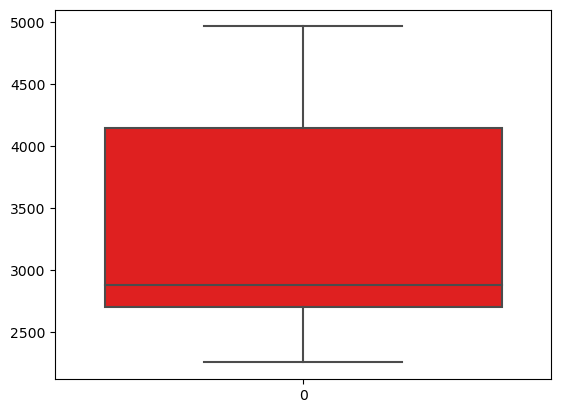

In [11]:
sns.boxplot(df['price'],color='red')

-  There are no outliers in data

In [12]:
import plotly.graph_objects as go

In [13]:
fig=go.Figure(data=go.Scatter(x=df['date'],y=df['price'],mode='lines'))
fig.show()

- Time Series Plots of Gold Price shows general movement of price data. 
- The Gold Price is generally increasing over the time. 

In [18]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month
df['Weekday']=df['date'].dt.weekday
df['Weekday']=np.where(df['Weekday']==0,7,df.Weekday)
df['Quarter']=df['date'].dt.quarter

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 1250x1020 with 7 Axes>,
 array([<AxesSubplot:ylabel='2016'>, <AxesSubplot:ylabel='2017'>,
        <AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2019'>,
        <AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>],
       dtype=object))

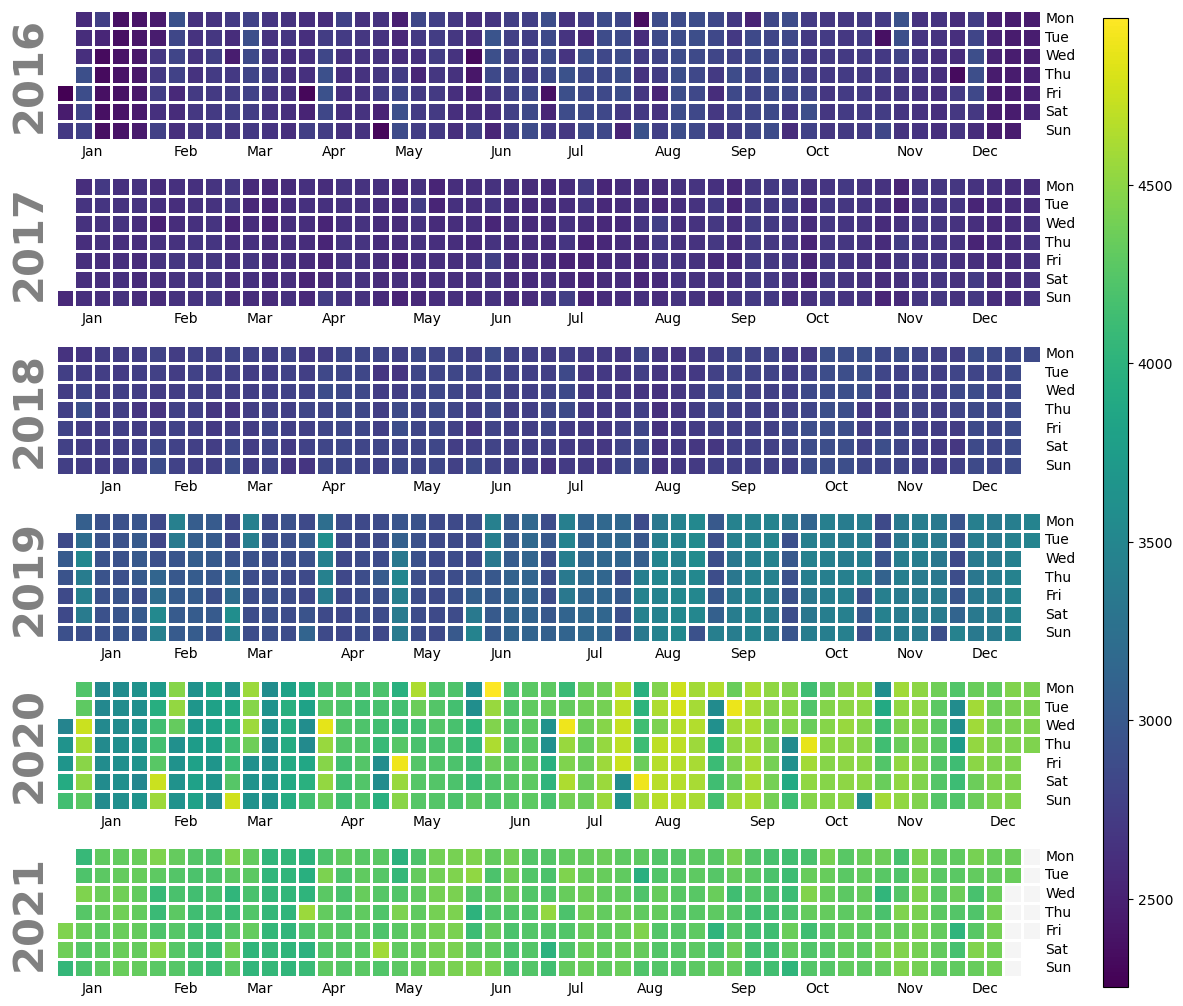

In [17]:
import calplot

data=df.copy()
data=data.set_index('date')

calplot.calplot(data['price'],edgecolor=None)

## From above plot we can conclude the gold prices are increasing 2016 to 2020
## In year 2020 the gold prices are very high , but in year 2021 the gold prices has decreased to some extent

In [ ]:
# There are no outliers in data

<AxesSubplot:xlabel='Year'>

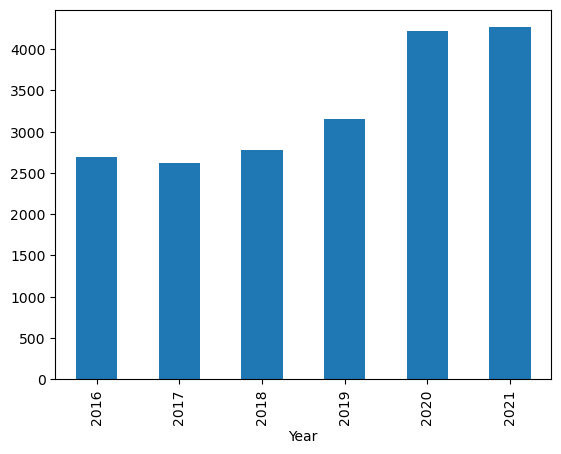

In [19]:
df_year=df.groupby('Year').mean()['price']
df_year.plot(kind='bar')

Text(0.5, 1.0, 'Month wise box plot \n (The Seasonality)')

<Figure size 1200x600 with 0 Axes>

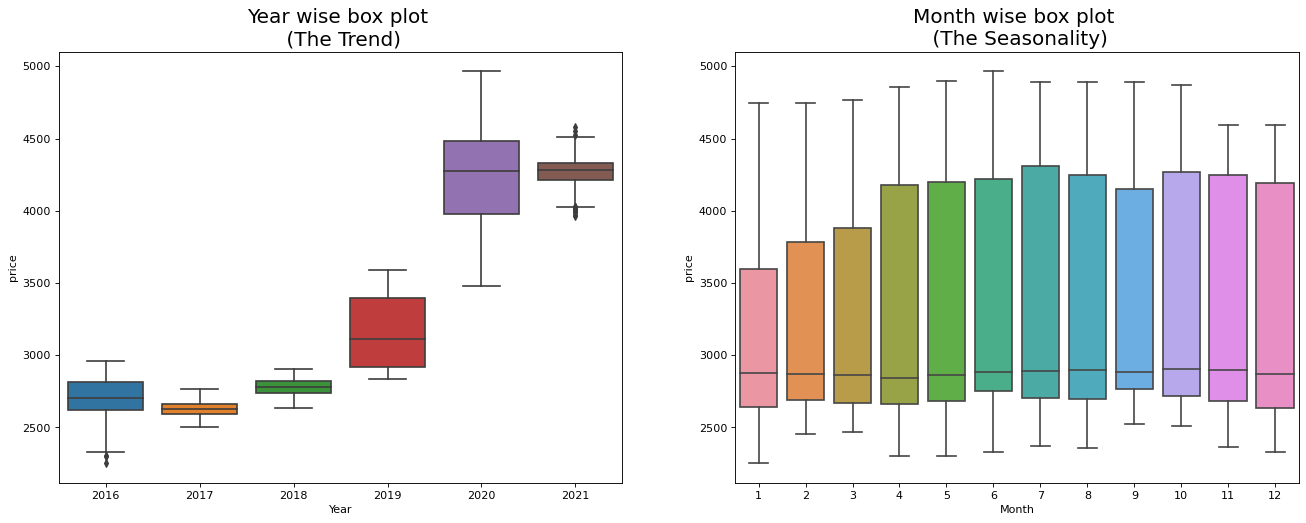

In [20]:
import seaborn as sns

fig=plt.figure(figsize=(12,6))
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=80)
sns.boxplot(x='Year',y='price',data=df,ax=axes[0])
sns.boxplot(x='Month',y='price',data=df,ax=axes[1])
axes[0].set_title('Year wise box plot \n (The Trend)',fontsize=18)
axes[1].set_title('Month wise box plot \n (The Seasonality)',fontsize=18)

In [21]:
df[df['Year']==2016]['price'].describe().T

count     366.000000
mean     2690.614162
std       146.639798
min      2252.600000
25%      2617.825000
50%      2704.750000
75%      2812.575000
max      2956.600000
Name: price, dtype: float64

In [22]:
df[df['Year']==2017]['price'].describe().T

count     365.000000
mean     2626.676484
std        50.634343
min      2506.500000
25%      2591.800000
50%      2625.100000
75%      2661.300000
max      2763.400000
Name: price, dtype: float64

In [23]:
df[df['Year']==2018]['price'].describe().T

count     365.000000
mean     2781.938082
std        60.387230
min      2637.900000
25%      2741.000000
50%      2778.400000
75%      2821.800000
max      2906.000000
Name: price, dtype: float64

In [24]:
df[df['Year']==2019]['price'].describe().T

count     365.000000
mean     3150.210685
std       236.765777
min      2832.700000
25%      2915.900000
50%      3115.100000
75%      3394.700000
max      3590.400000
Name: price, dtype: float64

In [25]:
df[df['Year']==2020]['price'].describe().T

count     366.000000
mean     4216.378689
std       362.345350
min      3477.600000
25%      3977.100000
50%      4276.900000
75%      4485.600000
max      4966.300000
Name: price, dtype: float64

In [26]:
df[df['Year']==2021]['price'].describe().T

count     355.000000
mean     4266.871549
std       113.907651
min      3965.300000
25%      4209.750000
50%      4282.800000
75%      4332.800000
max      4580.300000
Name: price, dtype: float64

- From the year 2017 to 2020 the gold increasing which has clear upward trend
- In the year 2016 and 2021 there are lot of outliers particularly in 2021 so they hard to interpret with central values such as   mean ,by comparing with median values of 2020 and 2021 we can observe that there is no much increase in gold price in year 2021
- As year passed the prices of gold are increased but in year in 2020 and 2021 and price fluctuation are more

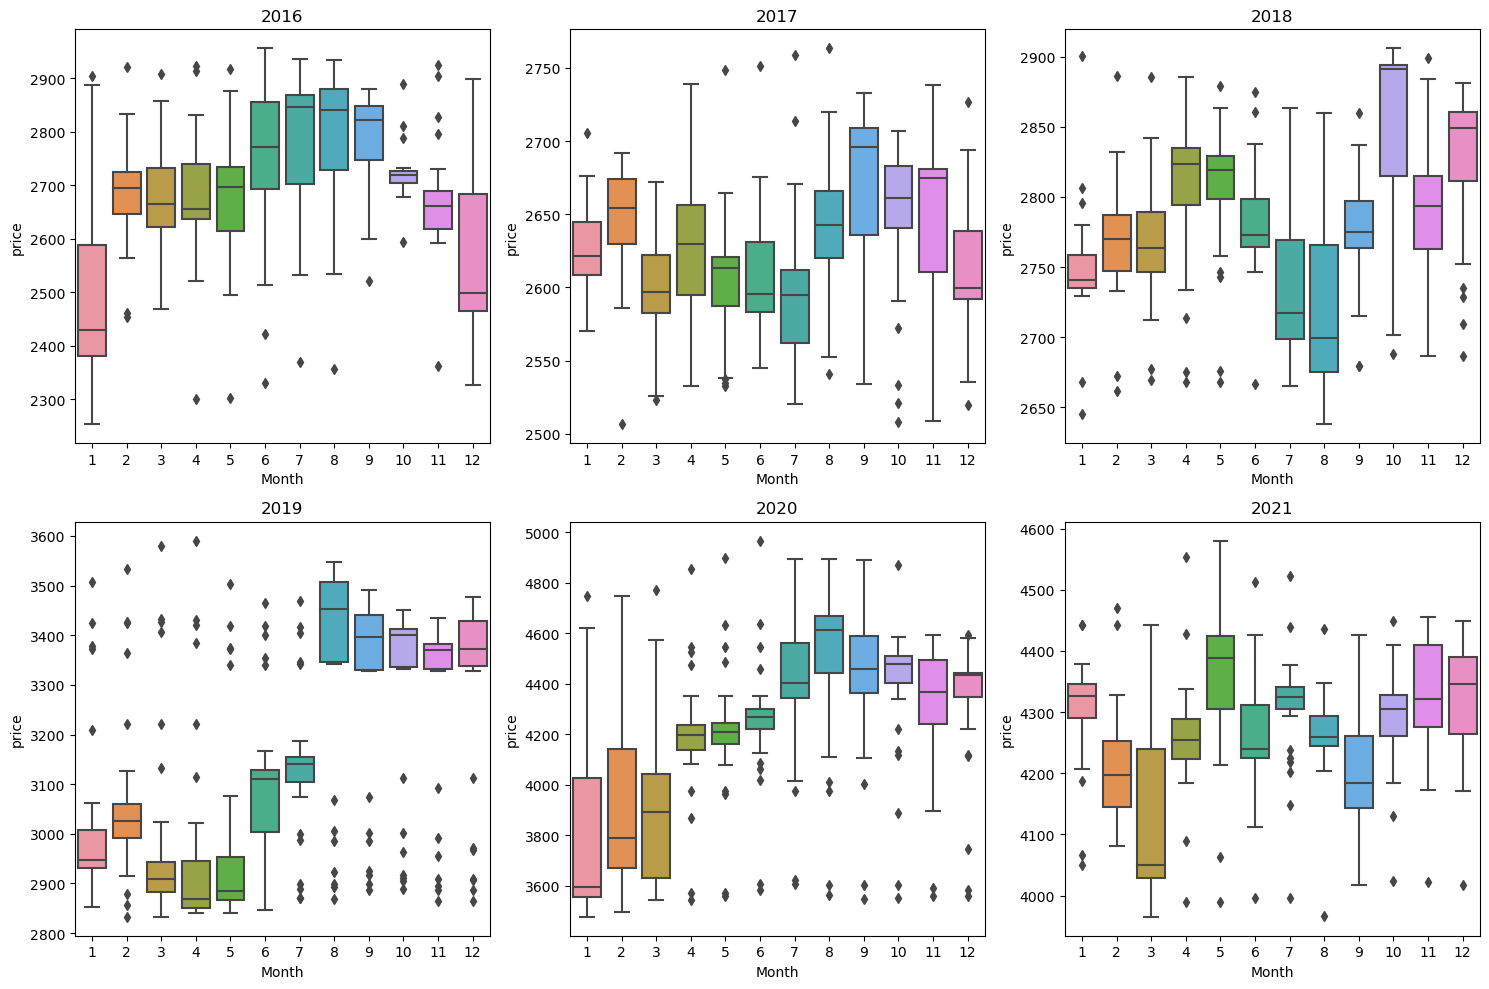

In [27]:
#df['year'] = df.index.Year
# create 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# loop through each year and create a boxplot for each month
for i, year in enumerate(df['Year'].unique()):
    data = df[df['Year'] == year].reset_index()
    sns.boxplot(x='Month', y='price', data=data, ax=axs[i])
    axs[i].set_title(str(year))
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('price')

plt.tight_layout()
plt.show()

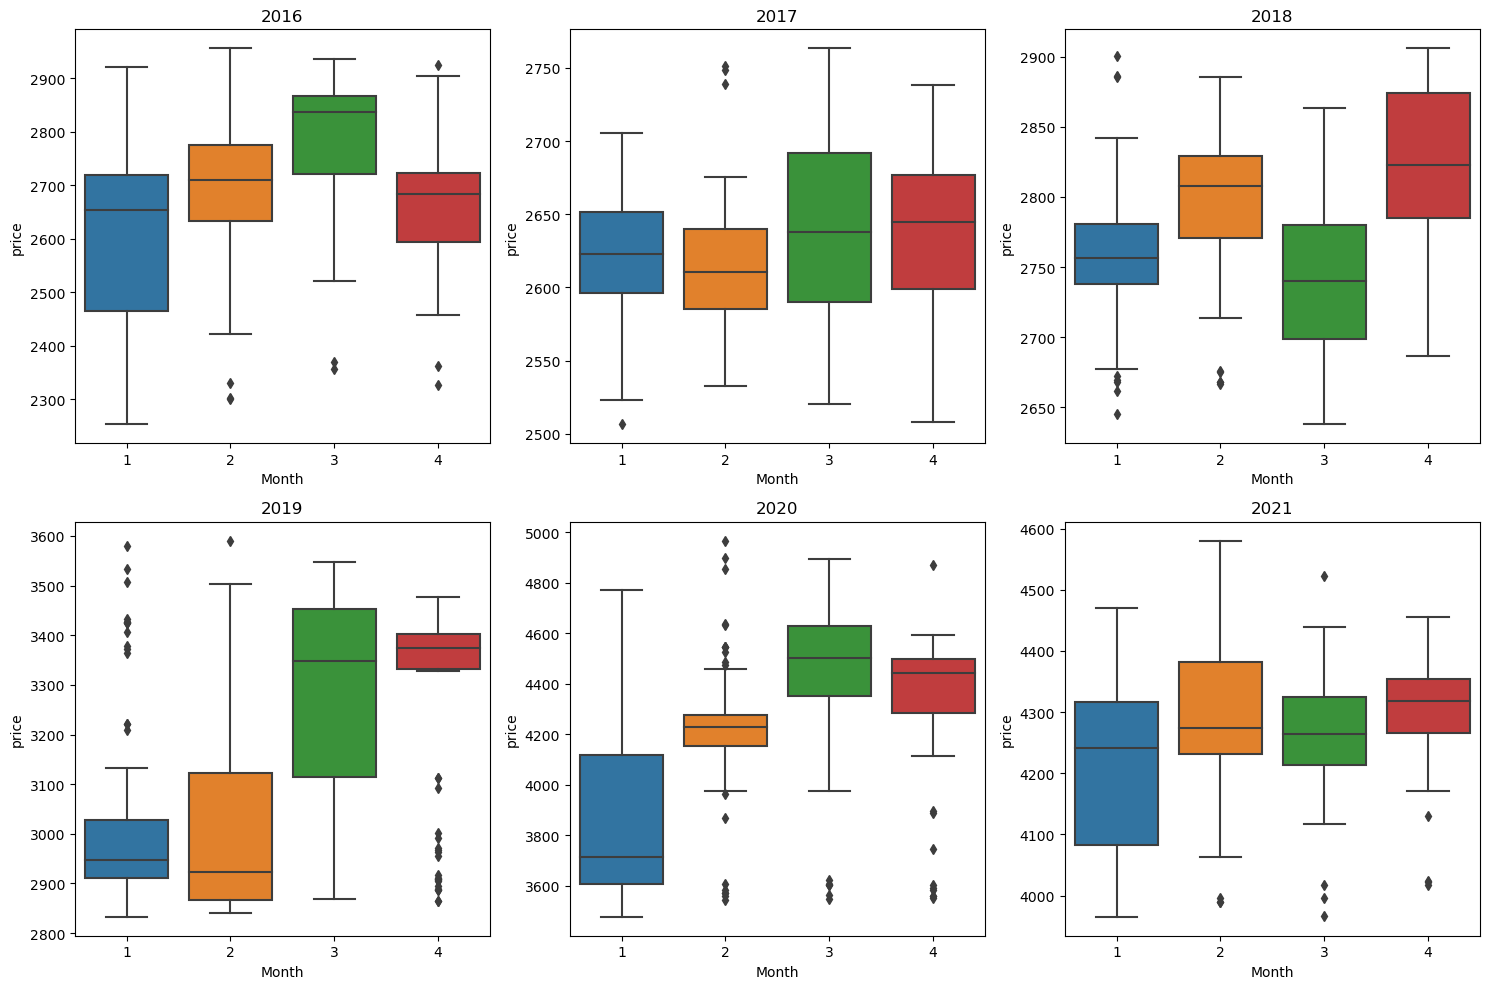

In [28]:
#df['year'] = df.index.Year
# create 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# loop through each year and create a boxplot for each month
for i, year in enumerate(df['Year'].unique()):
    data = df[df['Year'] == year].reset_index()
    sns.boxplot(x='Quarter', y='price', data=data, ax=axs[i])
    axs[i].set_title(str(year))
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('price')

plt.tight_layout()
plt.show()

# Time Series components

- For selecting forecasting methods, the time series can be broken down into systematic and unsystematic components. 
- A time series is composed of three systematic components including 'level', 'trend', 'seasonality', and one non-systematic component called 'noise'. The four components can be either additively or multiplicatively combined. The components in our dataset can be visually evaluated through the decomposition plots in the next section

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# read in the time series data
df1=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\gold forecasting\\Gold_data.csv", parse_dates=['date'], index_col='date')
result = seasonal_decompose(df1, model='multiplicative',period=30)

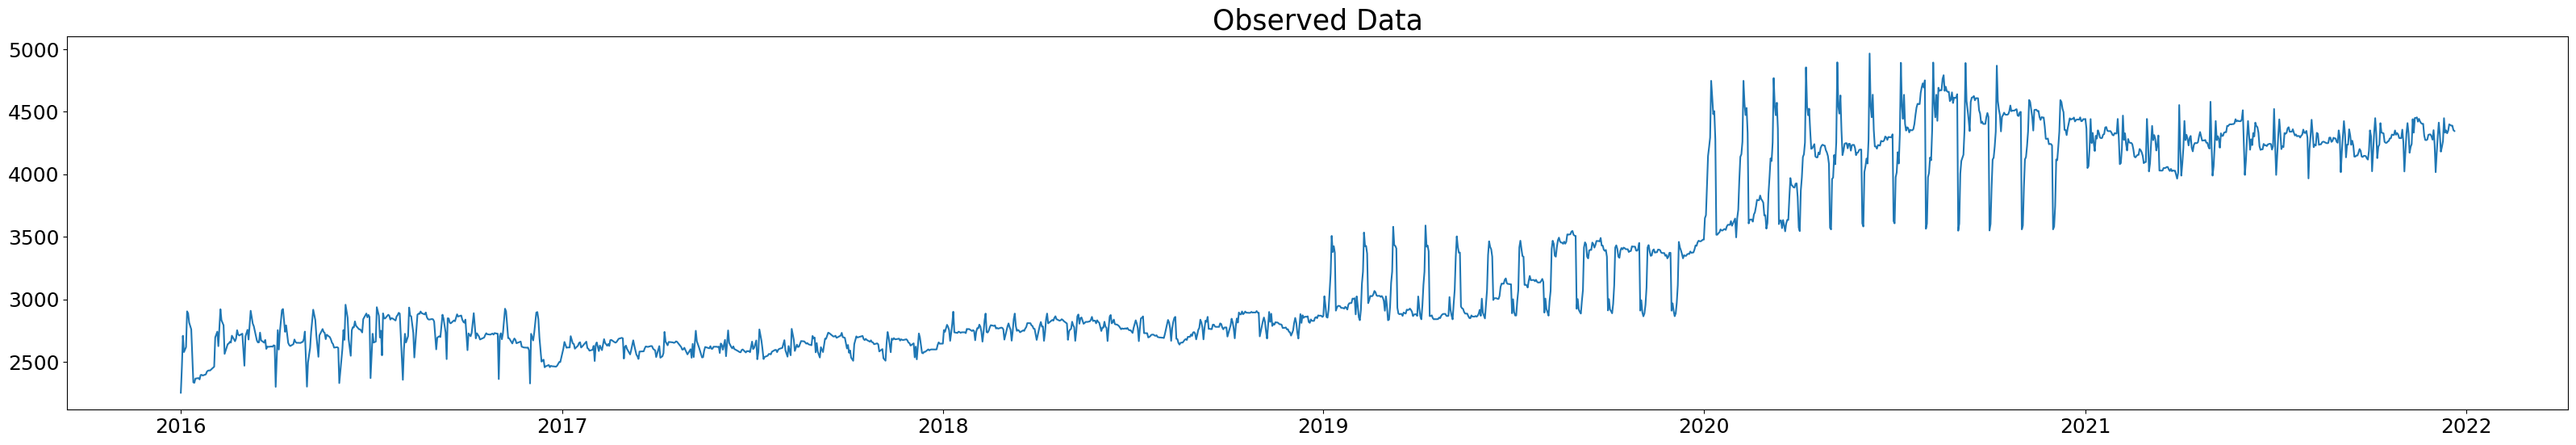

In [30]:
fig=plt.figure(figsize=(40,6))
fig,plt.plot(result.observed)
plt.title('Observed Data',size=25)
plt.yticks(size=18)
plt.xticks(size=18);

- From above plot it shows the observed values of Gold price from 2016 to 2021

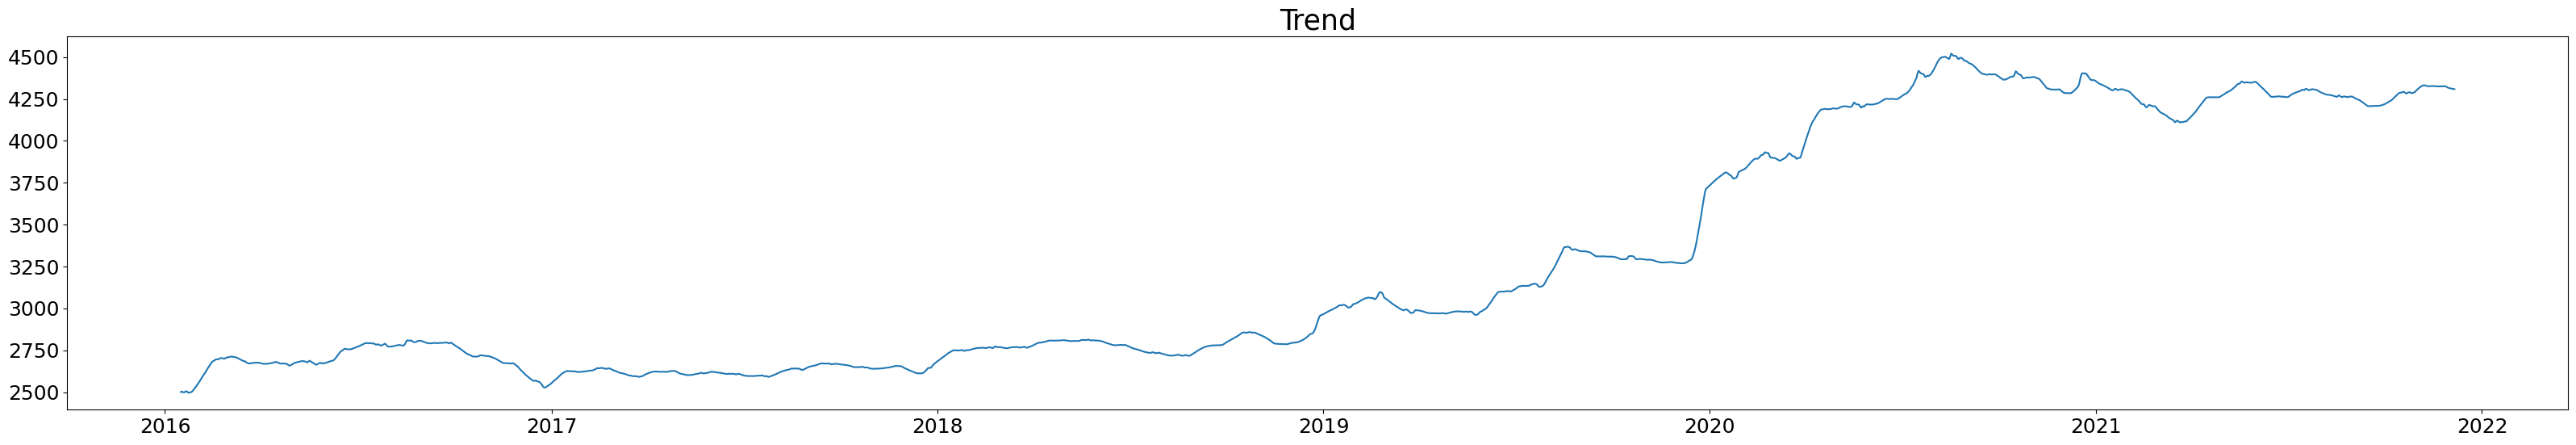

In [31]:
fig=plt.figure(figsize=(40,6))
fig,plt.plot(result.trend)
plt.title('Trend',size=25)
plt.yticks(size=18)
plt.xticks(size=18);

- In above plot, since the trend of the data from 2016 to 2019 is almost constant but changes from 2019 to 2021, it can be considered a changing trend. Specifically, it would be an increasing trend from 2019 to 2021.

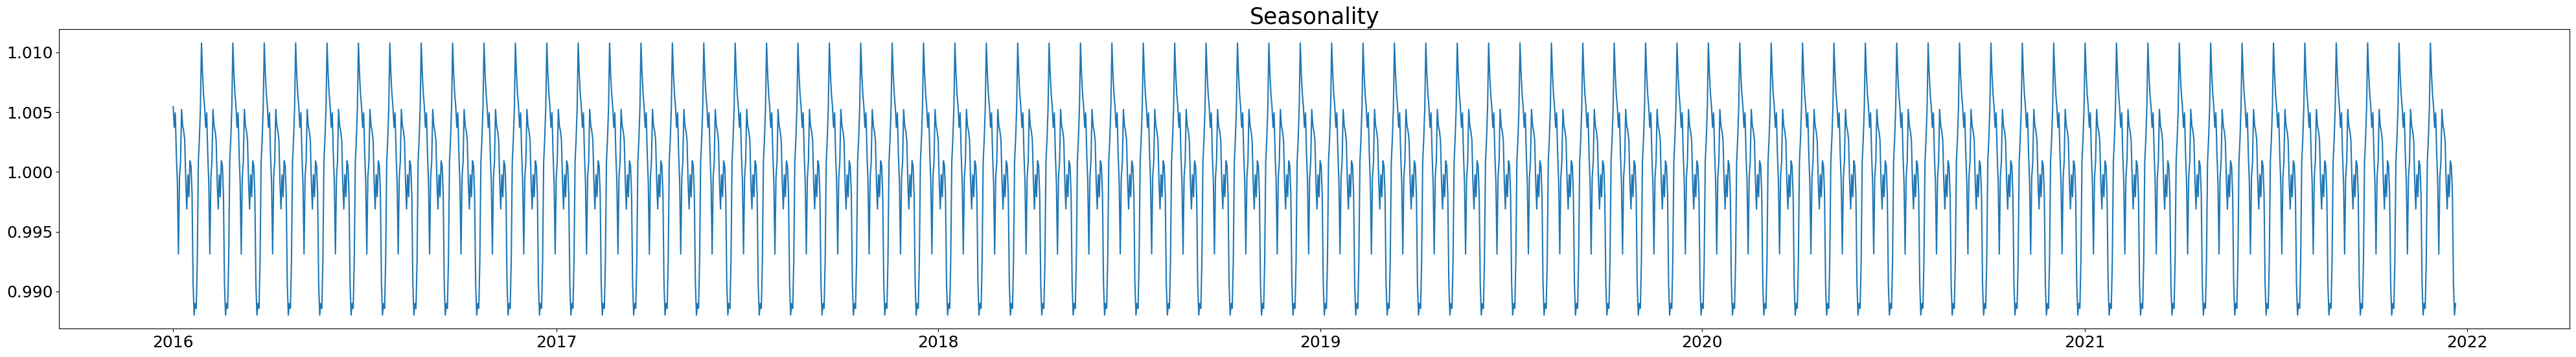

In [32]:
fig=plt.figure(figsize=(50,6))
fig,plt.plot(result.seasonal)
plt.title('Seasonality',size=25)
plt.yticks(size=18)
plt.xticks(size=18);

- If the seasonal component is relatively constant in magnitude over time, the data likely has additive seasonality. 

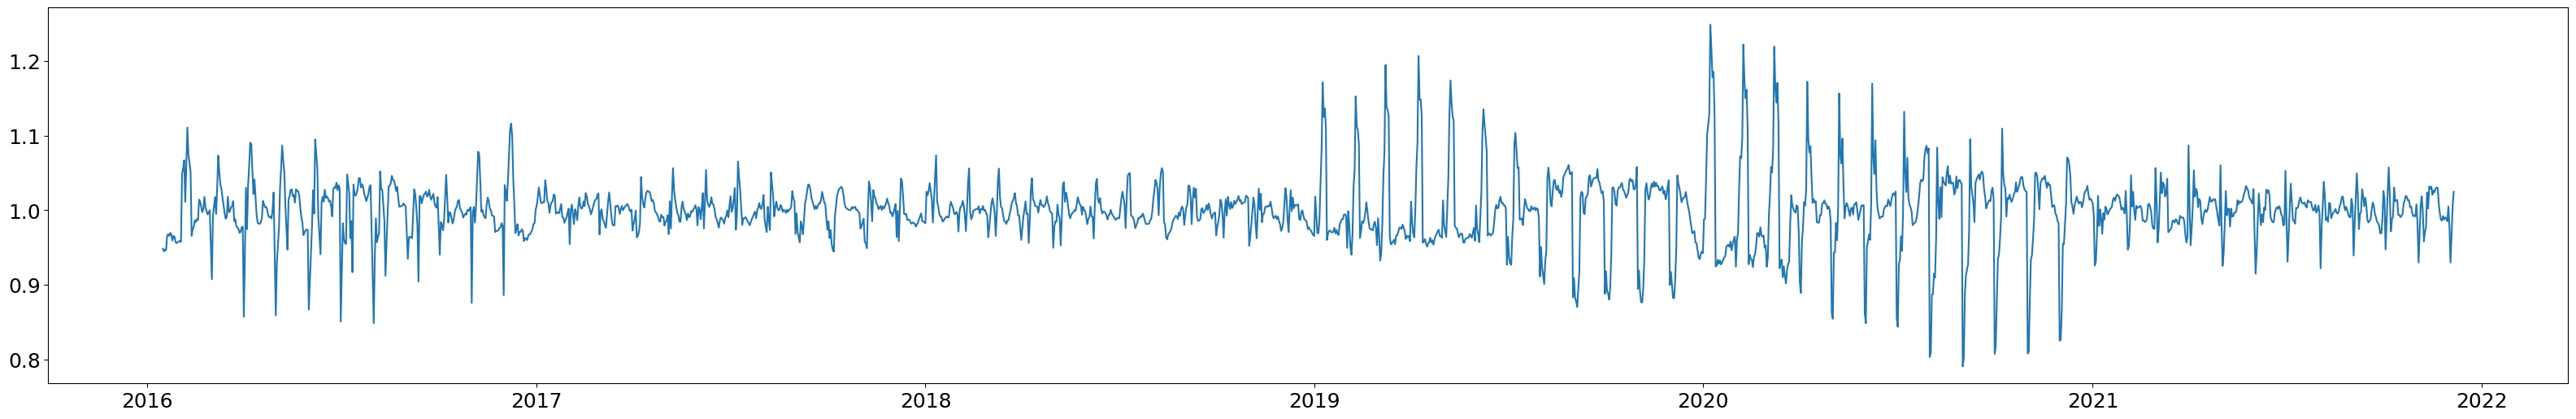

In [33]:
fig=plt.figure(figsize=(40,6))
fig,plt.plot(result.resid)
plt.yticks(size=18)
plt.xticks(size=18);

- If the residuals have more magnitude from 2019 to 2021 compared to previous years, it suggests that there might be some unexplained variability or noise in the data that the decomposition was not able to capture. 
- This could be due to external factors such as economic conditions or natural disasters(Covid) that are not accounted for in the time series.

In [34]:
# The residuals in time series analysis are the differences between the observed values and the predicted values.
# In seasonal decomposition, the predicted values are the sum of the trend, seasonal, and optionally, the residual component.
# Therefore, the residuals in seasonal decomposition are the differences between the observed values and the sum of the trend, seasonal, and residual components.

Text(0.5, 0, 'Year')

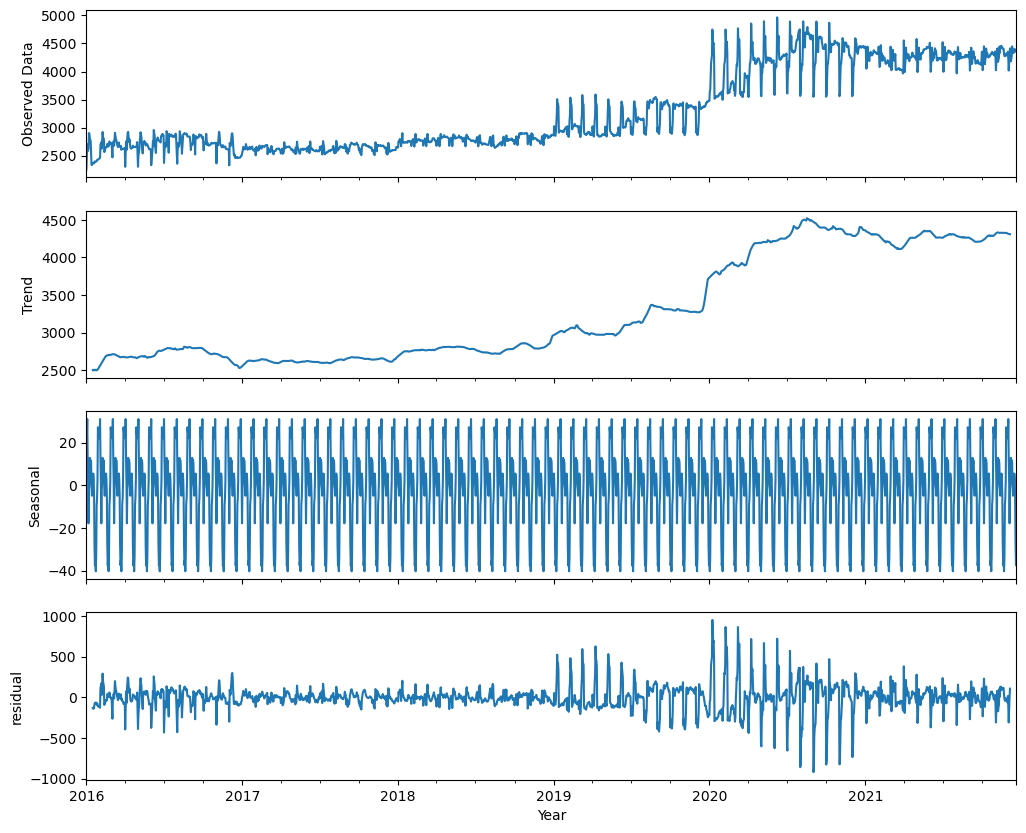

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df1['price'], model='additive', period=30)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex= True)
res.observed.plot(ax=ax1)
ax1.set_ylabel('Observed Data')
res.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
res.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
res.resid.plot(ax=ax4)
ax4.set_ylabel('residual')

plt.xlabel("Year")

Text(0.5, 0, 'Year')

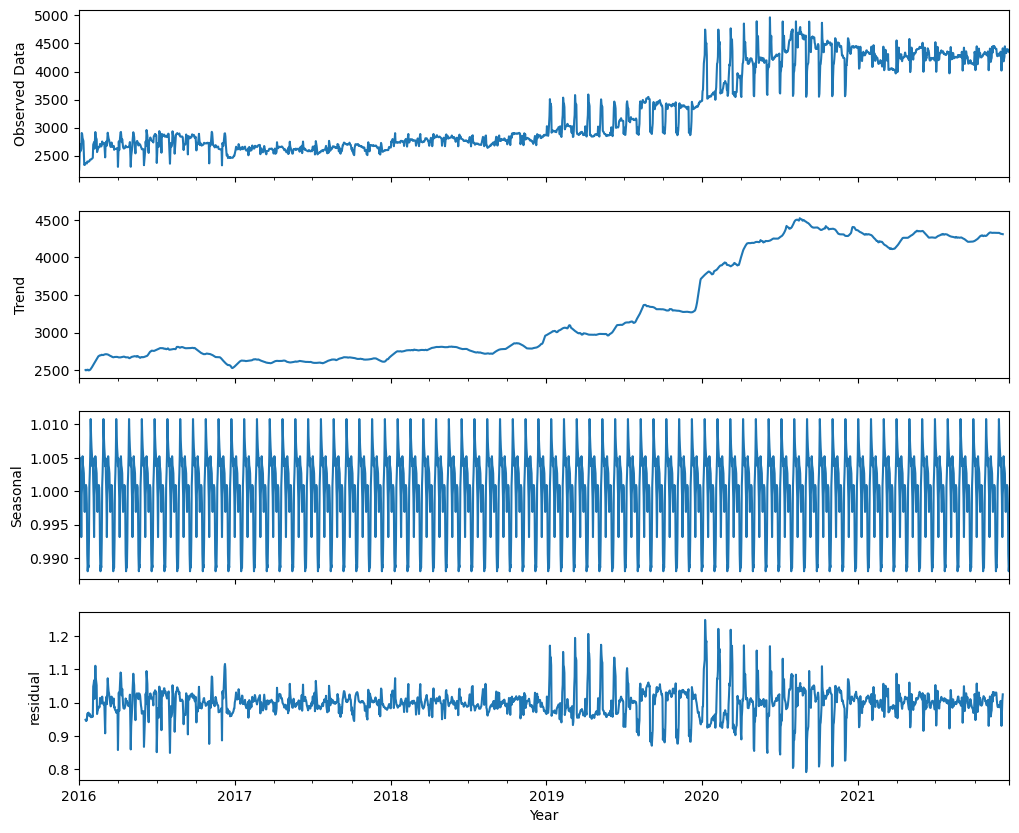

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df1['price'], model='multiplicative', period=30)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex= True)
res.observed.plot(ax=ax1)
plt.xlabel("Year")
ax1.set_ylabel('Observed Data')

res.trend.plot(ax=ax2)
plt.xlabel("Year")
ax2.set_ylabel('Trend')

res.seasonal.plot(ax=ax3)
plt.xlabel("Year")
ax3.set_ylabel('Seasonal')

res.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
plt.xlabel("Year")

# Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

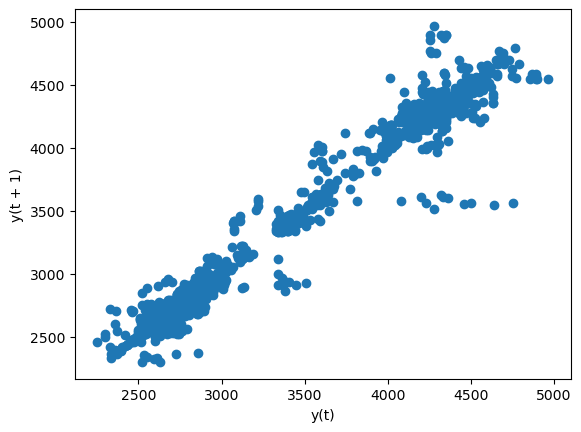

In [37]:
from pandas.plotting import lag_plot
lag_plot(df.price)

- From above plot we can see the sales at y(t) is linearly correlated with y(t+1) prior prices of gold

### We can check stationarity using the following
- ACF and PACF plots: If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
- Augmented Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

# ACF and PACF plots

- Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
- If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
- This data is non-stationary as a high number of previous observations are correlated with future values.
Confidence intervals are drawn as a cone.
- By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
- The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

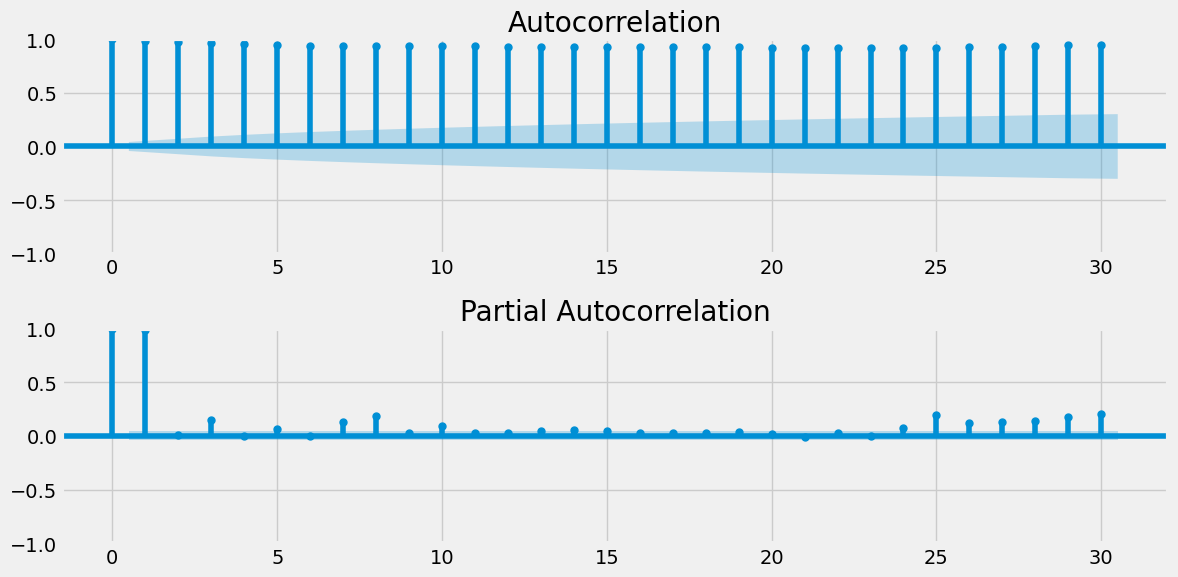

In [88]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,6))
plt.subplot(211)
plot_acf(df1.price, ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(df1.price, ax=plt.gca(), lags = 30)
plt.tight_layout()
plt.show()

- From the above for ACF plot we can see that the lines are above the standard error which expalins the lags k = 210 are positively correlated with current observation and after that drop off takes place so we can predict the prices atleast for 7 month with some amount of accuracy
- In pacf plots it explains the direct effect of the lags with current observation,after first lag we can see some lags are getting drop off in standard error and further some are above and below the standrad error.
- if the ACF plot shows that significant lags drop off after k=210, then a good starting point for the MA order would be q=210. And if the PACF plot shows that significant lags drop off after some point, then a good starting point for the AR order would be p=1 that point.(we could vary these lags till we get improved accuracy)
-  ACF measures the direct and indirect effects of all lags on the current observation, while PACF measures only the direct effect of a particular lag on the current observation. 

# Plotting Rolling Statistics

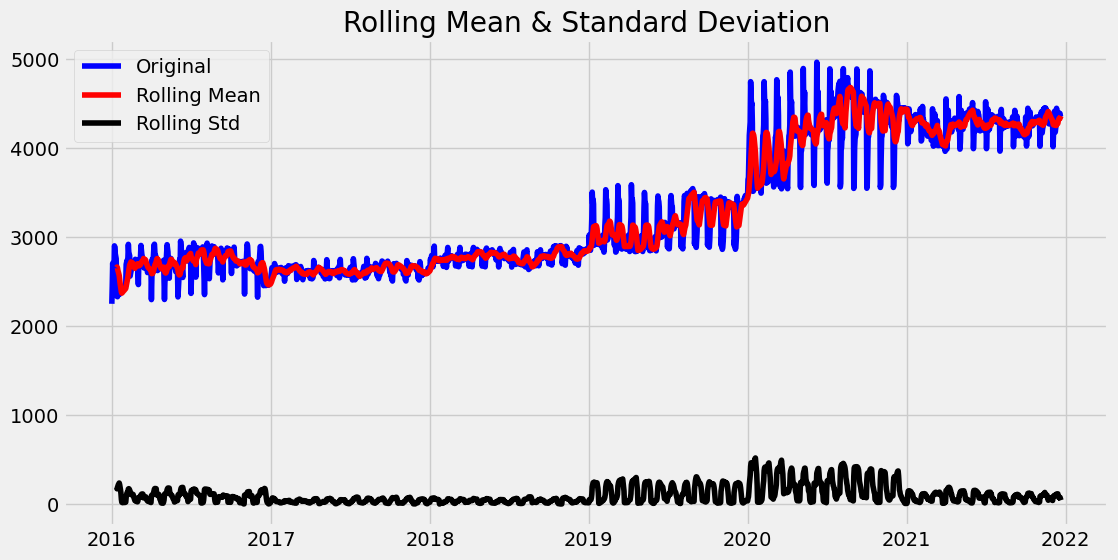

In [92]:
#Determing rolling statistics
window=12
rolmean = df1.rolling(window).mean()
rolstd = df1.rolling(window).std()

#Plot rolling statistics:
plt.figure(figsize=(12,6))
orig = plt.plot(df1, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
- The time series is hence not stationary

# Augmented Dickey-Fuller Test

- The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1) will provide no relevant information in predicting the change in y(t).
- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

In [93]:
from statsmodels.tsa.stattools import adfuller

In [94]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df1.price, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -0.309904
p-value                           0.924090
#Lags Used                       26.000000
Number of Observations Used    2155.000000
Critical Value (1%)              -3.433388
Critical Value (5%)              -2.862882
Critical Value (10%)             -2.567484
dtype: float64


### P-value is greater than 0.05,so we cannot reject the null hypothesis so the data is non-stationary

## Lets Create the function to check the statianarity

In [111]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=90).mean()
    rolstd = timeseries.rolling(window=90).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

## Making Time Series Stationary
#### There are 2 major reasons behind non-stationaruty of a TS:
- Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
- Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

## Transformations
- We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

- Log Scale Transformation
- Exponential tranformation
- Box Cox transformation
- Square root transformation

# Log Scale Transformation

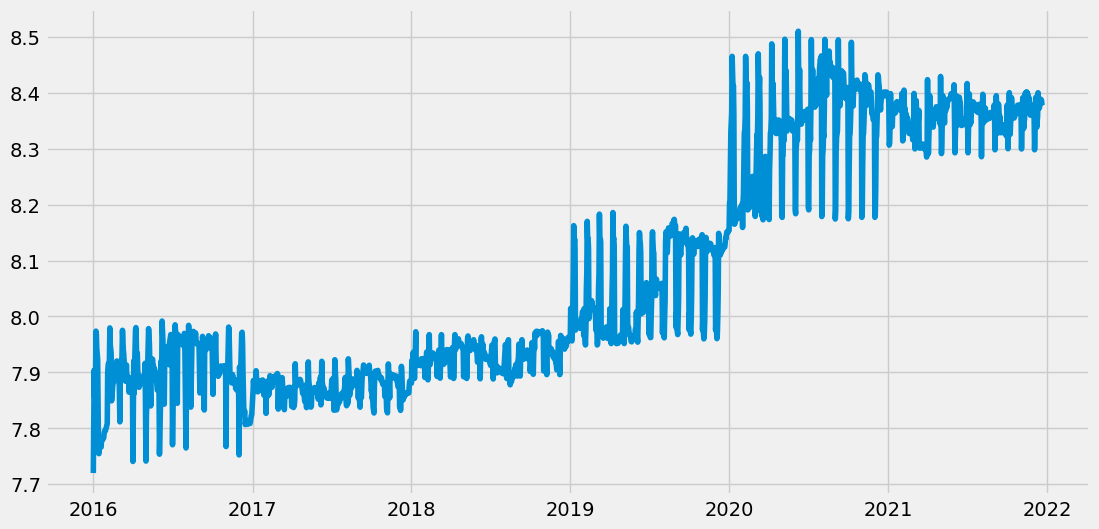

In [97]:
plt.figure(figsize=(12,6))
ts_log = np.log(df1)
plt.plot(ts_log)

# Techniques to remove Trend - Smoothing
- Smoothing is taking rolling averages over windows of time

# Moving Average


- Moving Average or Rolling mean is a technique used to smoothen the time series data by reducing the short-term fluctuations or noise.
- Short-term fluctuations in time series data refer to random, short-lived variations in the data that are not part of a consistent pattern or trend. These fluctuations are often caused by factors such as random events, measurement errors, or other sources of variability that affect the data.
- A drawback in this particular approach is that the time-period has to be strictly defined.

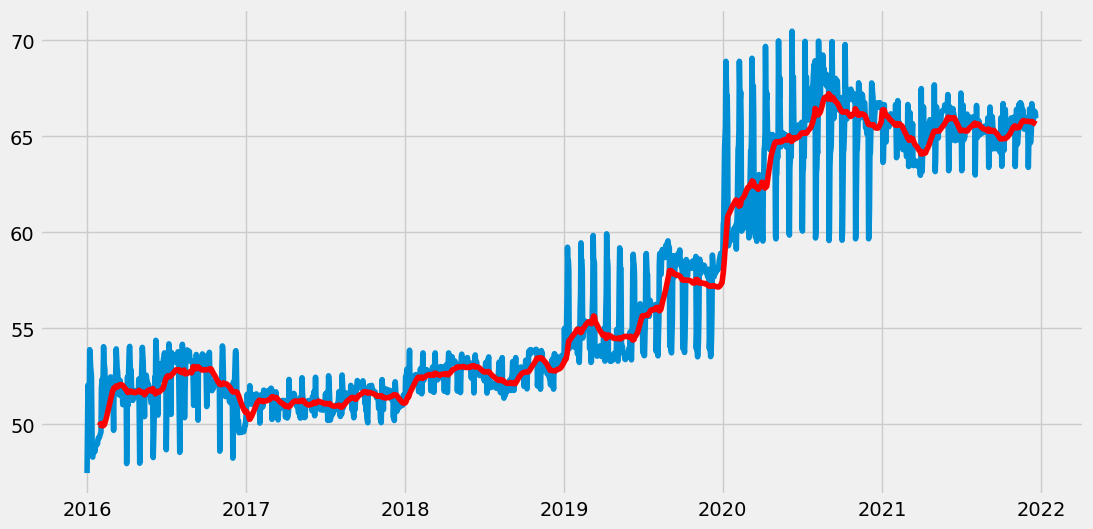

In [103]:
moving_avg = ts_log.rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [107]:
ts_log_moving_avg_diff = ts_log.price - moving_avg.price
ts_log_moving_avg_diff.head(50)

date
2016-01-01         NaN
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-09         NaN
2016-01-10         NaN
2016-01-11         NaN
2016-01-12         NaN
2016-01-13         NaN
2016-01-14         NaN
2016-01-15         NaN
2016-01-16         NaN
2016-01-17         NaN
2016-01-18         NaN
2016-01-19         NaN
2016-01-20         NaN
2016-01-21         NaN
2016-01-22         NaN
2016-01-23         NaN
2016-01-24         NaN
2016-01-25         NaN
2016-01-26         NaN
2016-01-27         NaN
2016-01-28         NaN
2016-01-29         NaN
2016-01-30   -0.570265
2016-01-31   -0.559204
2016-02-01   -0.481462
2016-02-02   -0.323197
2016-02-03    1.947558
2016-02-04    2.130125
2016-02-05    2.310912
2016-02-06    1.279476
2016-02-07    2.736125
2016-02-08    4.086230
2016-02-09    3.253262
2016-02-10    3.046515
2016-02-11    2.777238
2016-02-12    0.488318
2016-0

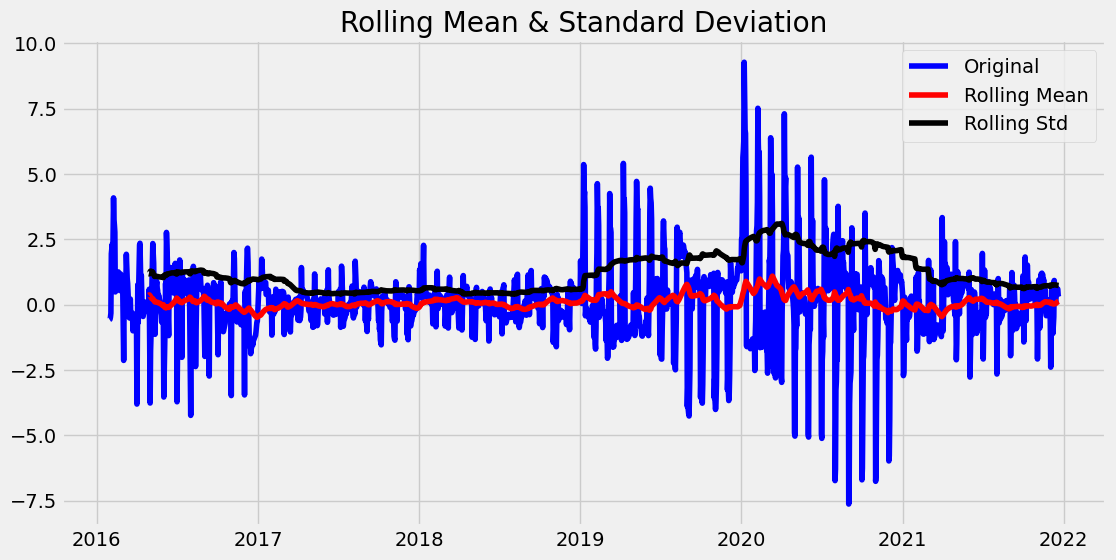

Results of Dickey-Fuller Test:
Test Statistic                -9.465679e+00
p-value                        4.236544e-16
#Lags Used                     2.600000e+01
Number of Observations Used    2.126000e+03
Critical Value (1%)           -3.433430e+00
Critical Value (5%)           -2.862900e+00
Critical Value (10%)          -2.567494e+00
dtype: float64


In [112]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [84]:
# #df['year'] = df.index.Year
# # create 6 subplots
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# axs = axs.ravel()

# # loop through each year and create a boxplot for each month
# for i, year in enumerate(df['Year'].unique()):
#     data = df[df['Year'] == year].reset_index()
#     sns.boxplot(x='Month', y='price', data=data, ax=axs[i])
#     axs[i].set_title(str(year))
#     axs[i].set_xlabel('Month')
#     axs[i].set_ylabel('price')

# plt.tight_layout()
# plt.show()

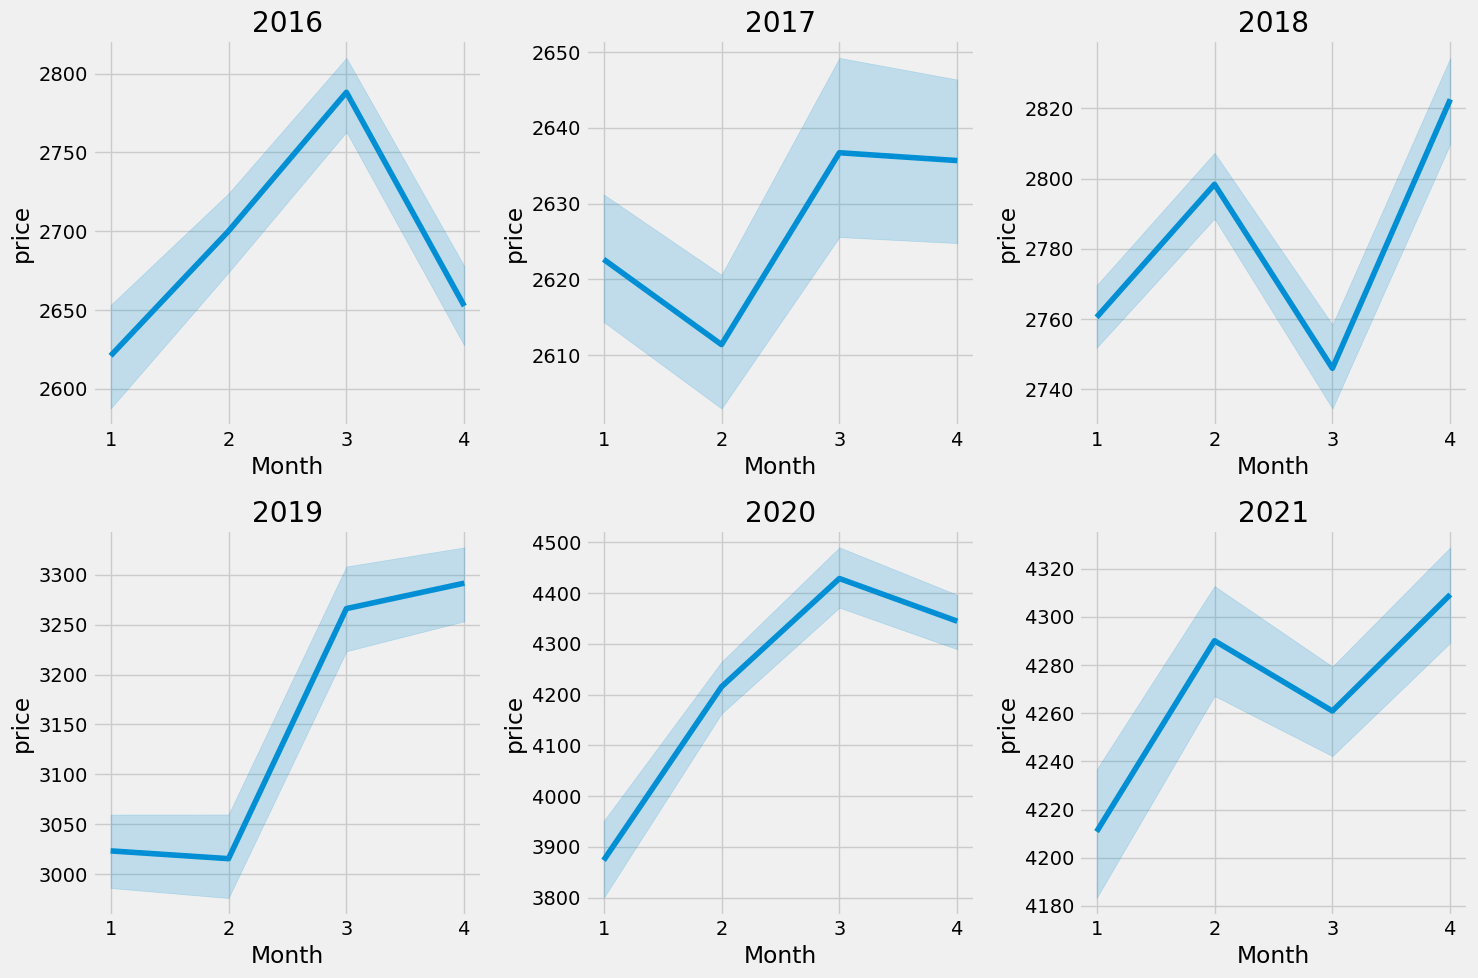

In [85]:
#df['year'] = df.index.Year
# create 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# loop through each year and create a boxplot for each month
for i, year in enumerate(df['Year'].unique()):
    data = df[df['Year'] == year].reset_index()
    sns.lineplot(x='Quarter', y='price', data=data, ax=axs[i])
    axs[i].set_title(str(year))
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('price')

plt.tight_layout()
plt.show()

### By above findings, we can conclude that Data is non-stationary, it may exhibit trends, seasonality, or other patterns that can make it difficult to model and predict future values accurately also we can conclude by statistical test using the Dicky Fuller Test

# Dicky-Fuller Test

In [68]:
from statsmodels.tsa.stattools import adfuller

# Generate a random non-stationary time series
df_dicky=df.set_index('date')
# Perform the Dickey-Fuller test
result = adfuller(df_dicky['price'])

# Print the test statistic and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is not stationary')

ADF Statistic: -0.309904
p-value: 0.924090
The time series is not stationary


- In the Dickey-Fuller test, the null hypothesis (H0) is that the time series data is non-stationary while the alternative hypothesis (Ha) is that the time series data is stationary data.
- Since P-Value is greater than 0.05 so we cannot reject the null hypothesis so our data is non-stationary data

# Stationarity

- A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
- Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

In [75]:
df_m=df.iloc[:,:2]
df_m

date    price
0    2016-01-01  2252.60
1    2016-01-02  2454.50
2    2016-01-03  2708.10
3    2016-01-04  2577.80
4    2016-01-05  2597.75
...         ...      ...
2177 2021-12-17  4394.40
2178 2021-12-18  4389.50
2179 2021-12-19  4389.50
2180 2021-12-20  4354.10
2181 2021-12-21  4346.50

[2182 rows x 2 columns]

In [65]:
df_dicky.drop(columns=['Year','Month','Weekday','Quarter'],inplace=True)

# Differencing the Time series to remoe the seasonal components

In [66]:
diff1 = df_dicky.diff().dropna()
diff1

price
date              
2016-01-02  201.90
2016-01-03  253.60
2016-01-04 -130.30
2016-01-05   19.95
2016-01-06   19.95
...            ...
2021-12-17   -5.40
2021-12-18   -4.90
2021-12-19    0.00
2021-12-20  -35.40
2021-12-21   -7.60

[2181 rows x 1 columns]

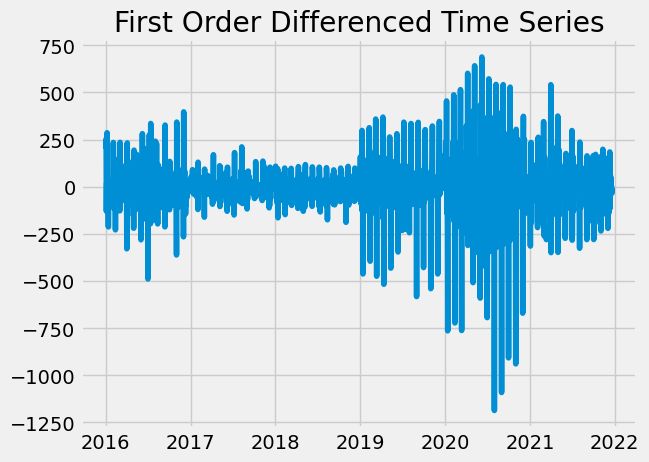

In [69]:
# Visualize the differenced time series
plt.plot(diff1)
plt.title('First Order Differenced Time Series')
plt.show()

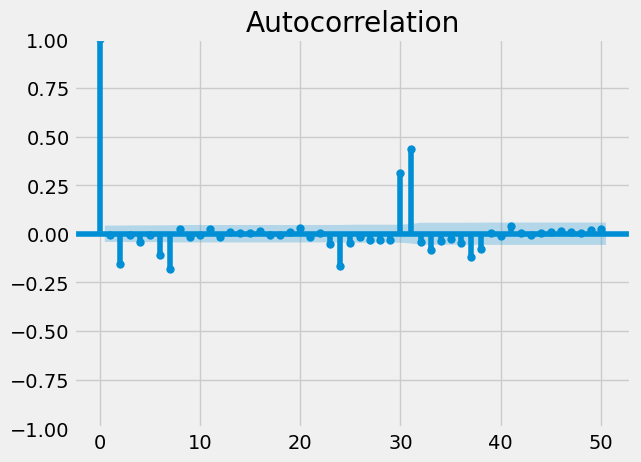

In [67]:
tsa_plots.plot_acf(diff1, lags=50)
plt.show()

In [70]:
df_dicky=df_dicky.diff()
df_dicky.dropna(inplace=True)
print("value:", adfuller(df_dicky['price'])[0],
     "p-value:", adfuller(df_dicky['price'])[1],
     "conf:", adfuller(df_dicky['price'])[4])

value: -21.664542127246392 p-value: 0.0 conf: {'1%': -3.4333895125643408, '5%': -2.86288274571734, '10%': -2.567484811553121}


- By differencing we can see that the seasonal components are removed by converting them into Stationary components

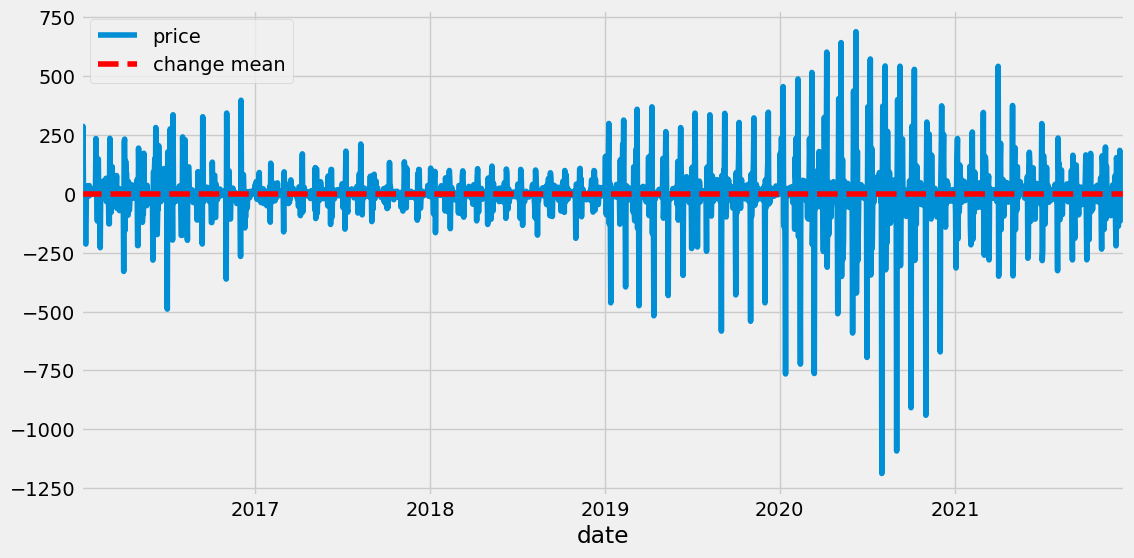

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')
df_dicky['price'].plot()
plt.axhline(y=df_dicky['price'].mean(), color='red', ls='--', label='change mean')
plt.legend()
plt.show()

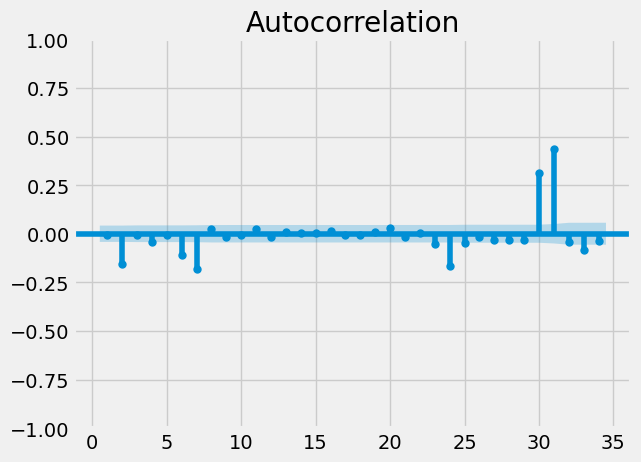

In [72]:
tsa_plots.plot_acf(df_dicky['price'], zero=False)
plt.show()

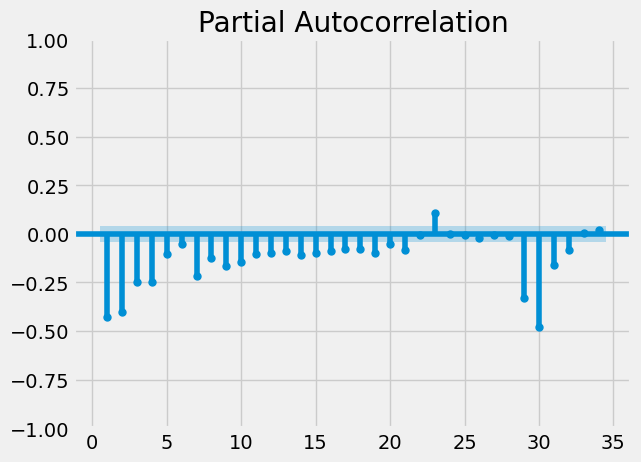

In [58]:
tsa_plots.plot_pacf(df_dicky['price'], zero=False)
plt.show()